bound_mu_L1_0.01 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005
bound_mu_L1_0.01 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005
bound_mu_L1_0.01 gxpred-bslmm_0.010_0.000_0.100_0.010_0.005
bound_mu_L1_0.01 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005
bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.100_0.010_0.005
bound_mu_NoPriors gxpred-bslmm_0.010_0.000_0.100_0.100_0.005


/home/fsimone/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


bound_mu_NoPriors gxpred-bslmm_0.010_0.000_0.100_0.010_0.005
bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.100_0.100_0.005
bound_mu_L1_0.05 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005
bound_mu_L1_0.05 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005
bound_mu_L1_0.05 gxpred-bslmm_0.010_0.000_0.100_0.010_0.005
bound_mu_L1_0.05 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005
bound_mu_InvG_3 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005
bound_mu_InvG_3 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005
bound_mu_InvG_3 gxpred-bslmm_0.010_0.000_0.100_0.010_0.005
bound_mu_InvG_3 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005
bound_mu_InvG_L1_0.1 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005
bound_mu_InvG_L1_0.1 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005
bound_mu_InvG_L1_0.1 gxpred-bslmm_0.010_0.000_0.100_0.010_0.005
bound_mu_InvG_L1_0.1 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005
bound_mu_InvG_L1_0.05 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005
bound_mu_InvG_L1_0.05 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005
bound_mu_InvG_L1

/home/fsimone/myenv/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


bound_mu_L1_0.1 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005
bound_mu_InvG_2 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005
bound_mu_InvG_2 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005
bound_mu_InvG_2 gxpred-bslmm_0.010_0.000_0.100_0.010_0.005
bound_mu_InvG_2 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005
bound_mu_InvG_L1_0.01 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005
bound_mu_InvG_L1_0.01 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005
bound_mu_InvG_L1_0.01 gxpred-bslmm_0.010_0.000_0.100_0.010_0.005
bound_mu_InvG_L1_0.01 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005


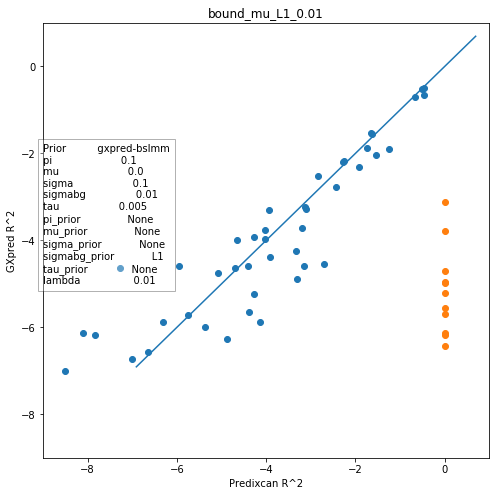

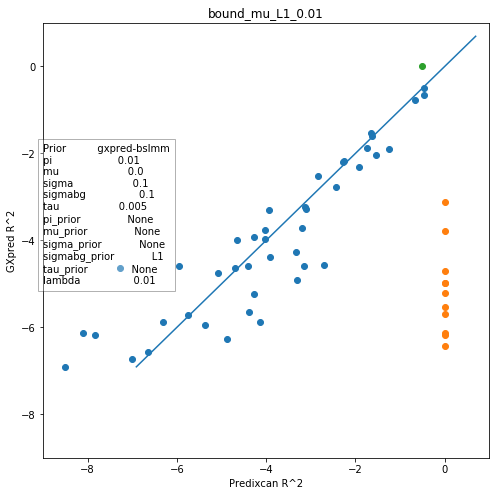

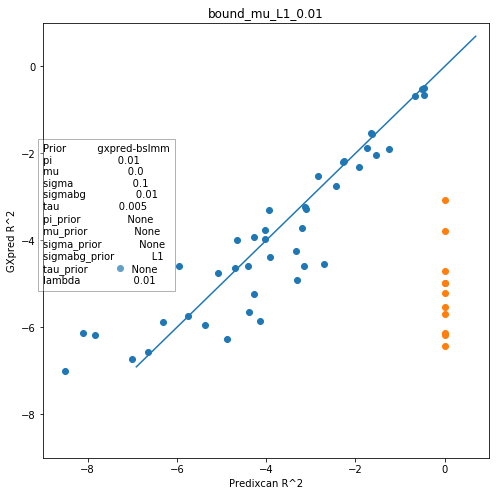

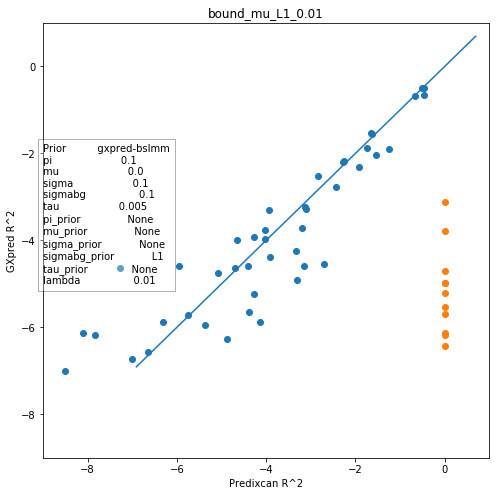

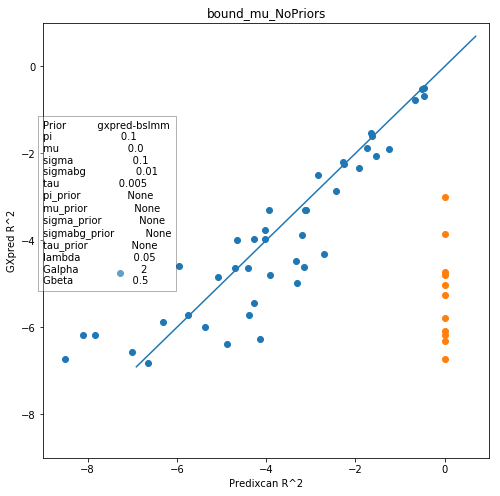

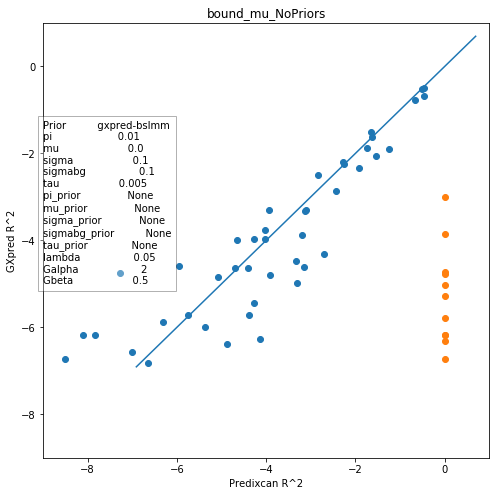

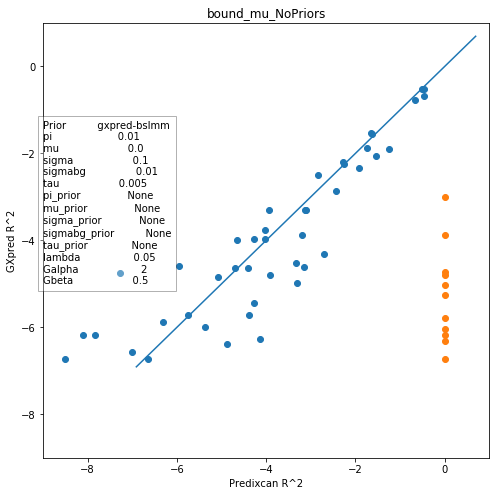

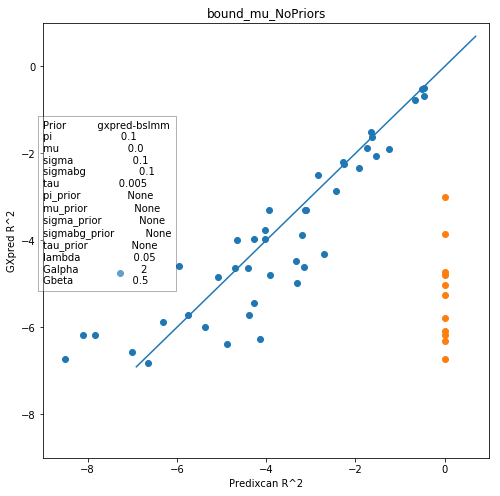

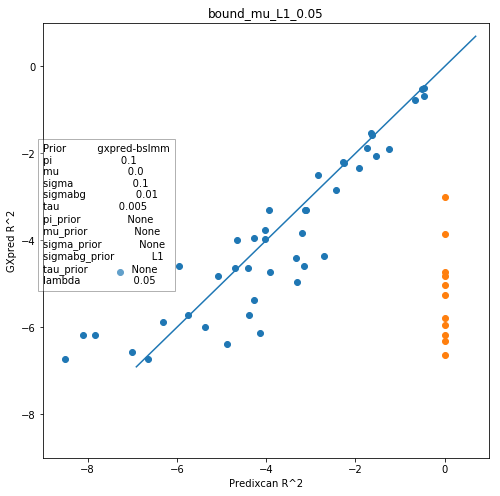

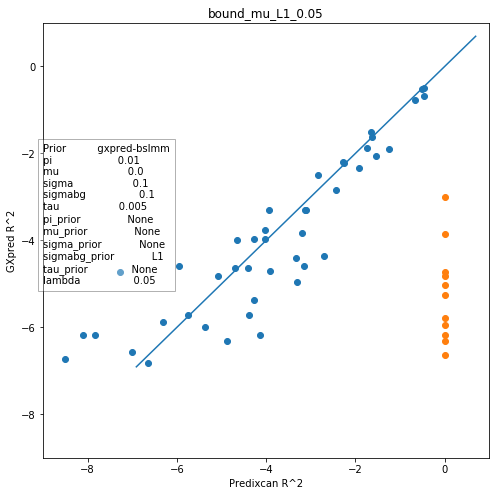

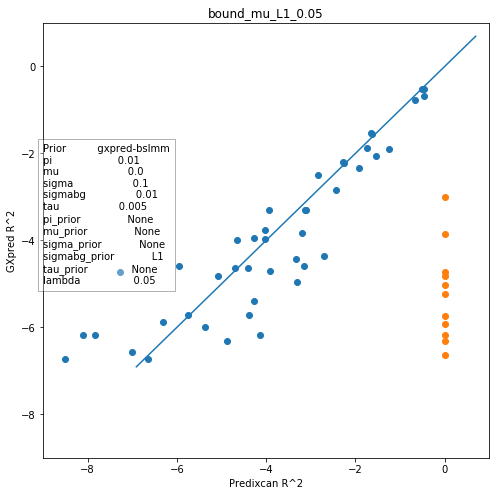

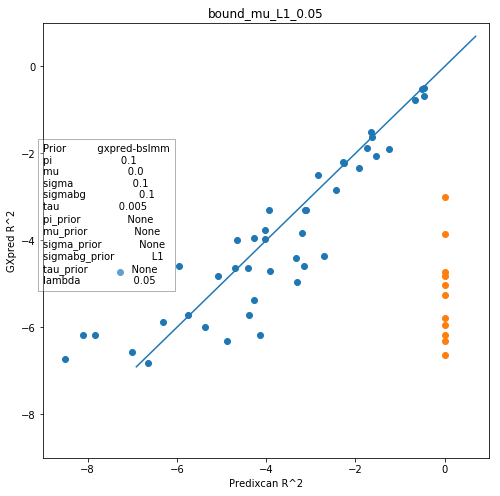

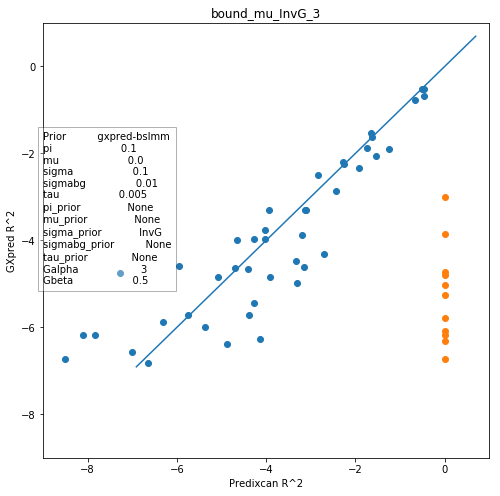

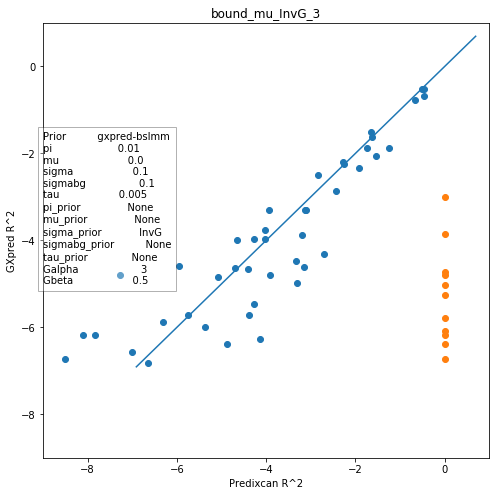

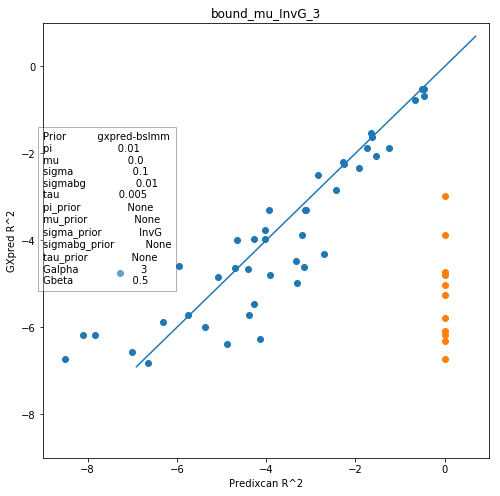

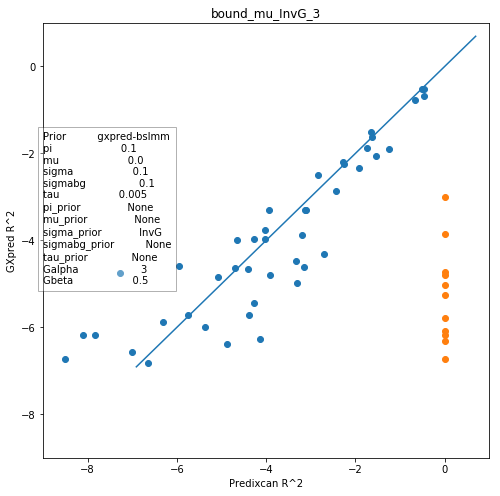

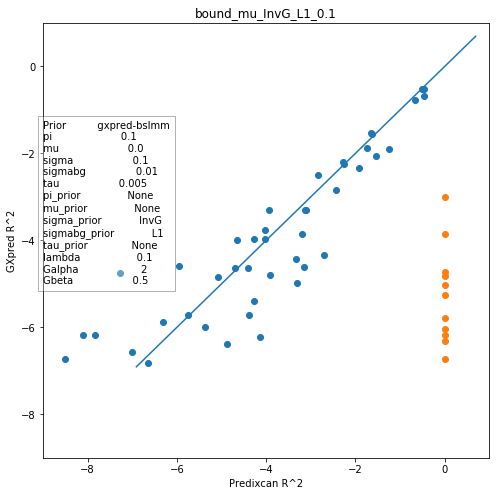

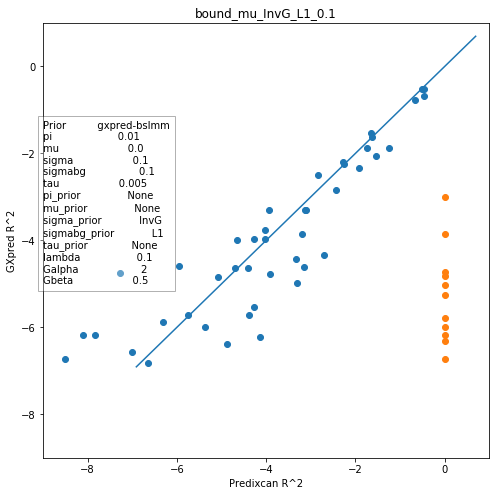

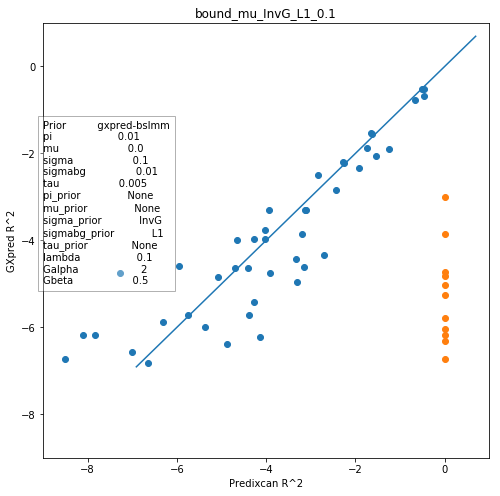

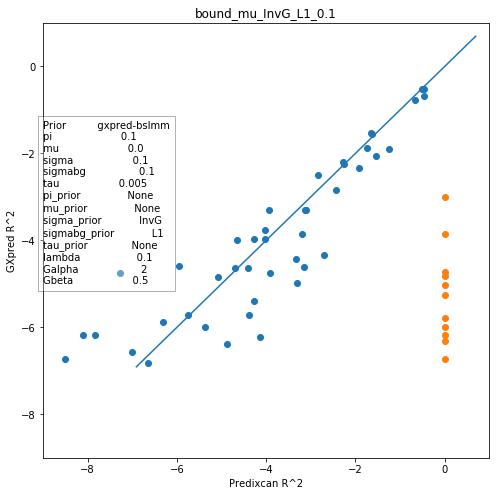

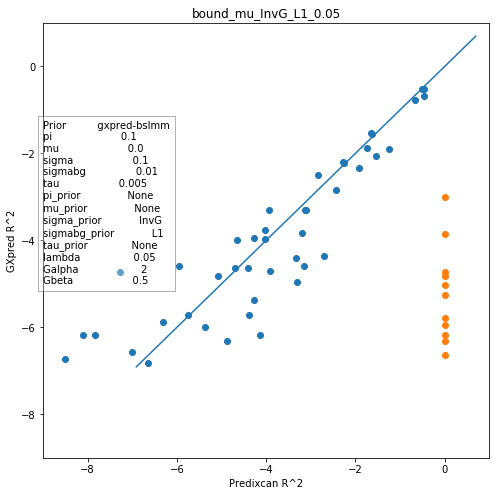

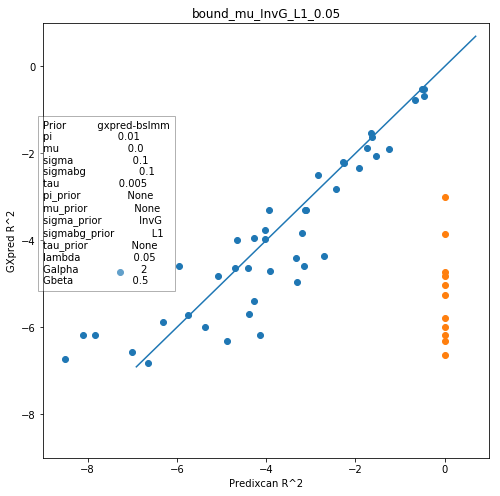

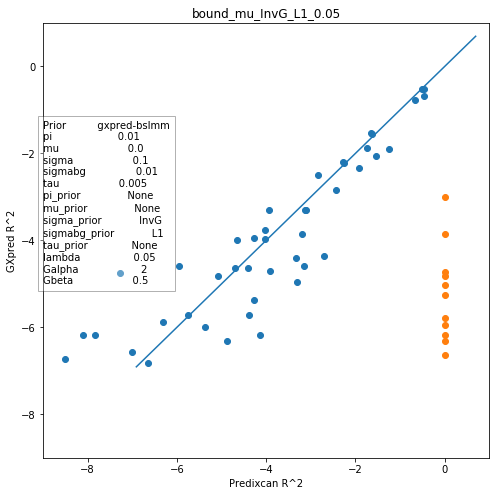

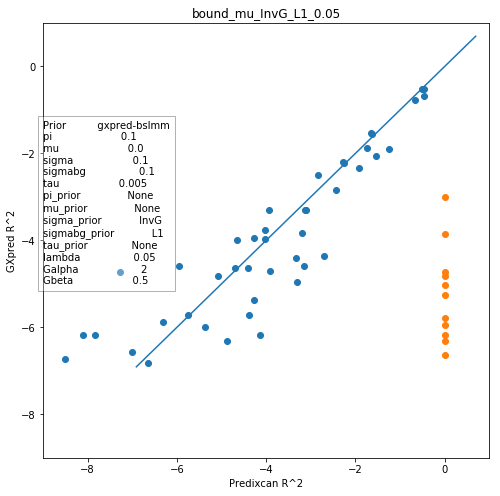

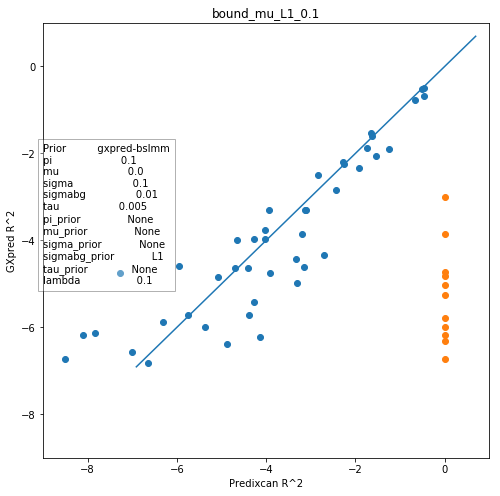

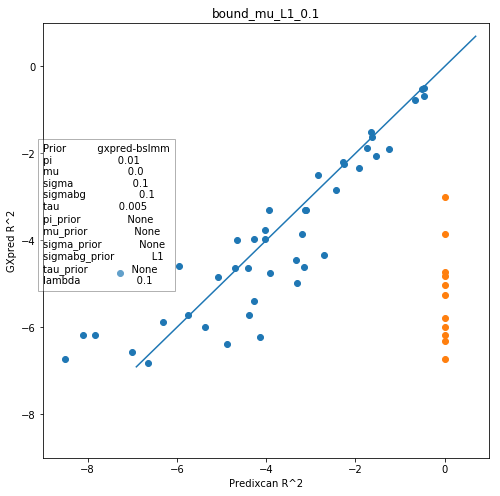

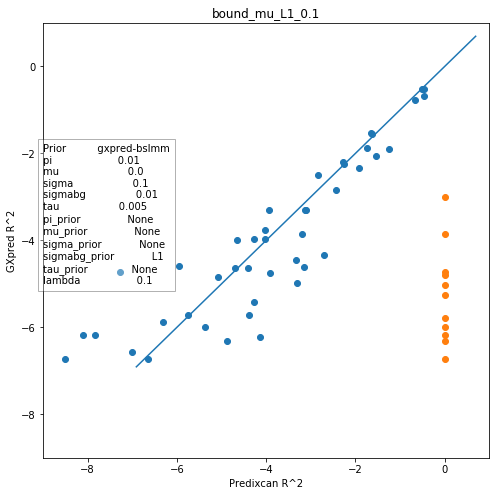

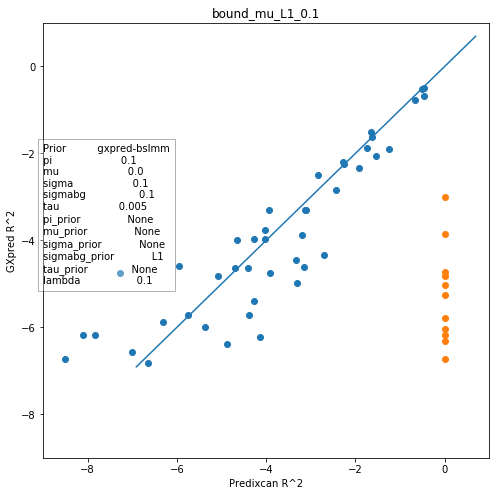

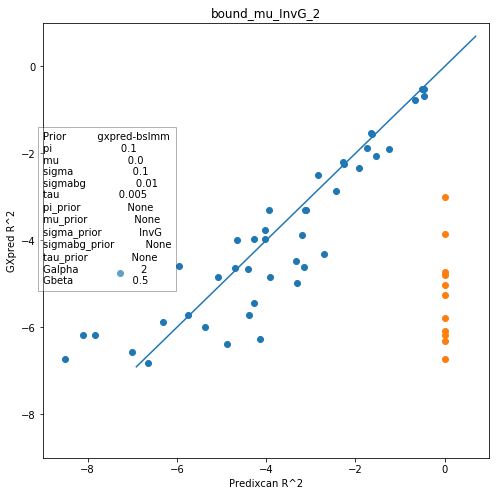

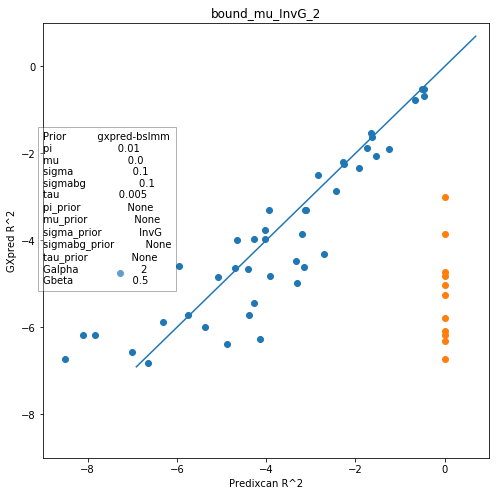

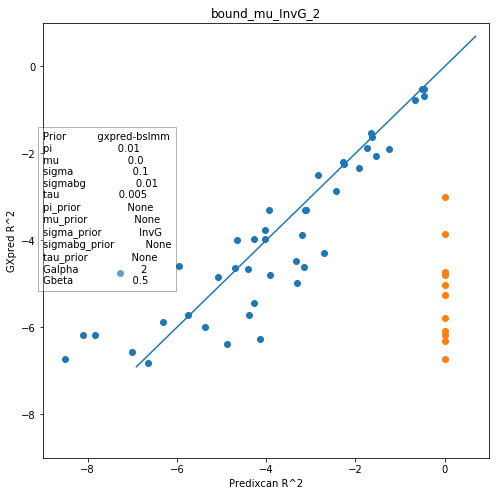

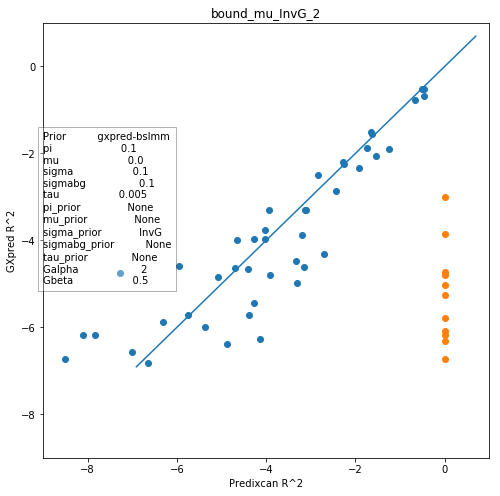

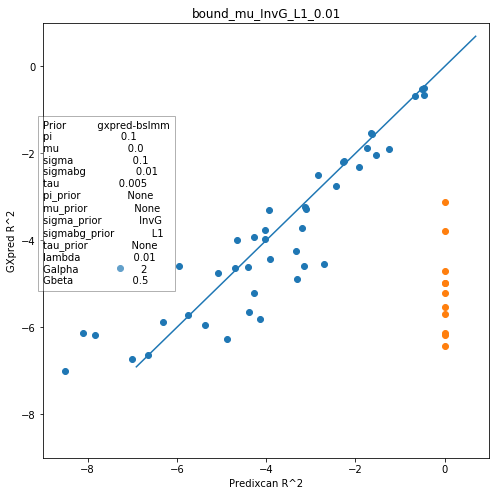

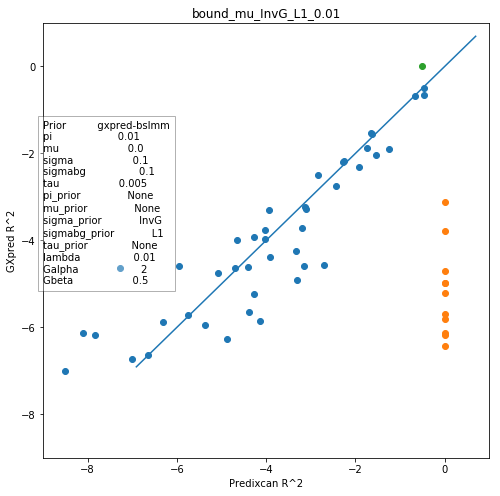

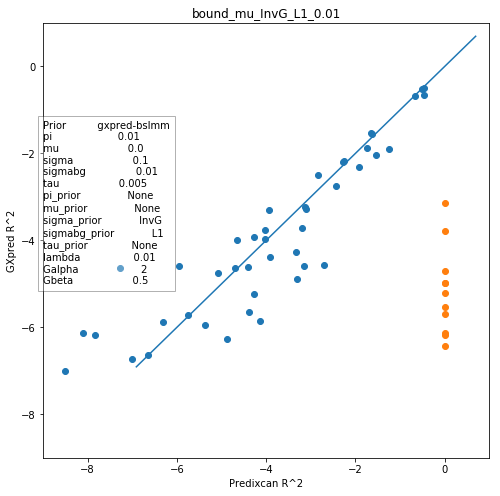

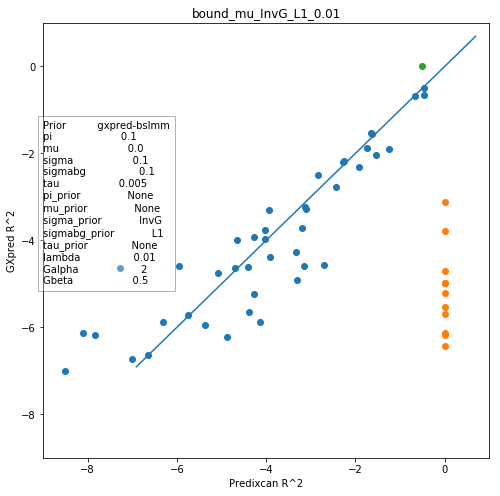

In [119]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


results_dir = "z1"

dirs = os.listdir(results_dir)

for d in dirs:
    subdirs = os.listdir(os.path.join(results_dir,d))
    for sd in subdirs:
        print(d, sd)
        df = pd.read_table(os.path.join(results_dir,d,sd,"genes_r2.txt"), header=0)
        params = pd.read_table(os.path.join(results_dir,d,sd,"params.txt"), header=None, index_col=0)
        # text = "\n".join(["\t".join([i,str(params.loc[i])]) for i in params.index])
        text = params.to_string(header=None, index_names=False, justify="left")
        #if float(params.loc["lambda"]) > 0.01:
        #    continue
        fig = plt.figure(figsize=(8,8))
        px_nan = df["predixcan"].isna()
        gx_nan = df["gxpred-bslmm"].isna()
        
        px_points = df[gx_nan]["predixcan"]
        gx_points = df[px_nan]["gxpred-bslmm"]
        
        ax = fig.add_subplot(111)
        ax.scatter(np.log(df["predixcan"]), np.log(df["gxpred-bslmm"]))
        ax.plot([np.log(0.001),np.log(2)], [np.log(0.001),np.log(2)])
        ax.scatter( np.repeat(0,len(gx_points)), np.log(gx_points))
        ax.scatter( np.log(px_points), np.repeat(0,len(px_points)))
        ax.set_xlabel('Predixcan R^2')
        ax.set_ylabel('GXpred R^2')
        ax.set_title(d)
        ax.set_xlim([-9,1])
        ax.set_ylim([-9,1])
        ax.text(-9, -5, text, bbox={'facecolor':'white','alpha':0.3, 'pad':5})
        #plt.show()
        #raise

In [89]:
px_nan = df["predixcan"].isna()
gx_nan = df["gxpred-bslmm"].isna()
df[gx_nan]
#df["gxpred-bslmm"].isna() 
df[px_nan]
params


,1
0,
Prior,gxpred-bslmm
pi,0.1
mu,0.0
sigma,0.1
sigmabg,0.0001
tau,0.005
pi_prior,None
mu_prior,None
sigma_prior,None


In [148]:
results_dir = "z1"

dirs = os.listdir(results_dir)

prev_df = np.array([])
for d in dirs:
    subdirs = os.listdir(os.path.join(results_dir,d))
    for sd in subdirs:
        # print(d, sd)
        df = pd.read_table(os.path.join(results_dir,d,sd,"genes_r2.txt"), header=0)
        df=df.rename(columns = {'gxpred-bslmm':d})
        print(d,sd,"\t","Failures: ",np.sum(~df.Success))
        if prev_df.shape[0] == 0:
            prev_df = df[["Ensembl_ID",d]]
            continue
        prev_df = prev_df.merge(df[["Ensembl_ID",d]], on="Ensembl_ID", how="outer")
        

bound_mu_L1_0.01 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005 	 Failures:  0
bound_mu_L1_0.01 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005 	 Failures:  1
bound_mu_L1_0.01 gxpred-bslmm_0.010_0.000_0.100_0.010_0.005 	 Failures:  0
bound_mu_L1_0.01 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005 	 Failures:  0
bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.100_0.010_0.005 	 Failures:  0
bound_mu_NoPriors gxpred-bslmm_0.010_0.000_0.100_0.100_0.005 	 Failures:  0
bound_mu_NoPriors gxpred-bslmm_0.010_0.000_0.100_0.010_0.005 	 Failures:  0
bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.100_0.100_0.005 	 Failures:  0
bound_mu_L1_0.05 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005 	 Failures:  0
bound_mu_L1_0.05 gxpred-bslmm_0.010_0.000_0.100_0.100_0.005 	 Failures:  0
bound_mu_L1_0.05 gxpred-bslmm_0.010_0.000_0.100_0.010_0.005 	 Failures:  0
bound_mu_L1_0.05 gxpred-bslmm_0.100_0.000_0.100_0.100_0.005 	 Failures:  0
bound_mu_InvG_3 gxpred-bslmm_0.100_0.000_0.100_0.010_0.005 	 Failures:  0
bound_mu_InvG_3 gxpred

In [149]:
prev_df

,Ensembl_ID,bound_mu_L1_0.01_x,bound_mu_L1_0.01_y,bound_mu_L1_0.01_x,bound_mu_L1_0.01_y,bound_mu_NoPriors_x,bound_mu_NoPriors_y,bound_mu_NoPriors_x,bound_mu_NoPriors_y,bound_mu_L1_0.05_x,...,bound_mu_L1_0.1_x,bound_mu_L1_0.1_y,bound_mu_InvG_2_x,bound_mu_InvG_2_y,bound_mu_InvG_2_x,bound_mu_InvG_2_y,bound_mu_InvG_L1_0.01_x,bound_mu_InvG_L1_0.01_y,bound_mu_InvG_L1_0.01_x,bound_mu_InvG_L1_0.01_y
0,ENSG00000013583.4,0.0245,0.0245,0.0246,0.0245,0.0209,0.0209,0.0209,0.0208,0.0216,...,0.0213,0.0209,0.0209,0.0210,0.0209,0.0209,0.0245,0.0245,0.0246,0.0245
1,ENSG00000064115.6,0.1501,0.1500,0.1500,0.1500,0.1514,0.1514,0.1514,0.1514,0.1512,...,0.1513,0.1513,0.1514,0.1514,0.1514,0.1514,0.1501,0.1499,0.1500,0.1500
2,ENSG00000078237.4,0.0012,0.0012,0.0012,0.0012,0.0014,0.0014,0.0014,0.0014,0.0014,...,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0012,0.0012,0.0012,0.0012
3,ENSG00000090382.2,0.6036,0.6035,0.6036,0.6036,0.6023,0.6025,0.5996,0.6024,0.6030,...,0.6003,0.6027,0.5969,0.5970,0.5974,0.5970,0.6039,0.6038,0.6038,0.6038
4,ENSG00000110851.7,0.0234,0.0235,0.0234,0.0234,0.0230,0.0231,0.0230,0.0230,0.0231,...,0.0231,0.0231,0.0230,0.0230,0.0230,0.0230,0.0234,0.0234,0.0234,0.0234
5,ENSG00000110917.3,0.0143,0.0139,0.0142,0.0142,0.0115,0.0114,0.0110,0.0114,0.0121,...,0.0117,0.0117,0.0115,0.0115,0.0114,0.0115,0.0143,0.0143,0.0140,0.0141
6,ENSG00000110921.7,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028,...,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028,0.0028
7,ENSG00000111145.3,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096,...,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096,0.0096
8,ENSG00000111199.6,0.0021,0.0021,0.0021,0.0021,0.0018,0.0018,0.0018,0.0018,0.0018,...,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0021,0.0021,0.0021,0.0021
9,ENSG00000111450.9,0.0188,0.0188,0.0188,0.0188,0.0187,0.0187,0.0187,0.0187,0.0187,...,0.0187,0.0187,0.0187,0.0187,0.0187,0.0187,0.0188,0.0188,0.0188,0.0188
